# *Name :* _**Jonnada Sai Rahul**_
# *Technical Task-1 :* _**Prediction Using Supervised ML**_
## *Level :* _**Beginner**_

### In this task we will predict the Percentage of an student based on the no of study hours. 

### **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**CONSTRAINS**

In [3]:
df.describe(include="all")

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**ALL COLUMNS AND DATATYPES**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**CHECKING WHETHER THERE IS ANY NULL VALUE**

In [5]:
df.isnull == True

False

**FROM (df.isnull == True >> False) WE UNDERSTOOD THAT DF HAS NO NULLVALUES SO WE CAN CONTINUE WITH VISUALISATION OF DATA**

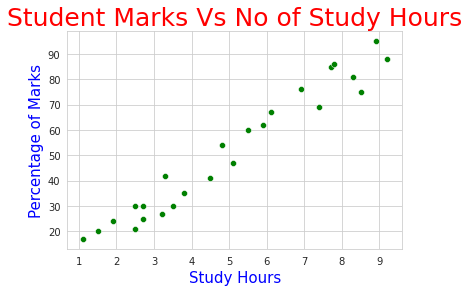

In [6]:
sns.set_style('whitegrid')
sns.scatterplot(x= df['Hours'], y= df['Scores'], color="green")
plt.title('Student Marks Vs No of Study Hours',size=25,color="red")
plt.xlabel('Study Hours', size=15,color="blue")
plt.ylabel('Percentage of Marks', size=15,color="blue")
plt.show()

**PLOTING A REGRESSION LINE FOR THE SCATTER PLOT GRAPH**

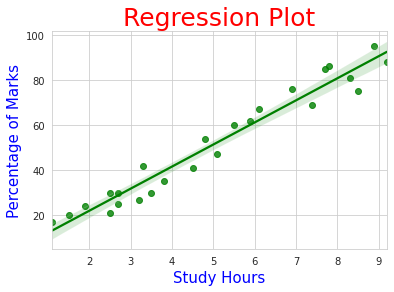

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
sns.regplot(x= df['Hours'], y= df['Scores'], color="green")
plt.title('Regression Plot',size=25,color="red")
plt.xlabel('Study Hours', size=15,color="blue")
plt.ylabel('Percentage of Marks', size=15,color="blue")
plt.show()
print(df.corr())

# **TRAINING THE MODEL**

**LETS DEFINE VARIABLES P & Q FROM THE DATASET AND THEN SPLIT THE DATASET INTO TWO PARTS AND DATA FITTING IN THE MODEL**

In [8]:
P = df.iloc[:, :-1].values  
Q = df.iloc[:, 1].values

train_P, val_P, train_Q, val_Q = train_test_split(P, Q, random_state = 0)

In [9]:
var_regression = LinearRegression()
var_regression.fit(train_P, train_Q)
print("THE MODEL IS TRAINED SUCCESSFULLY!")

THE MODEL IS TRAINED SUCCESSFULLY!


**PREDICTION OF THE PERCENTAGE OF THE MARKS**

In [10]:
var_prediction_Q = var_regression.predict(val_P)
Prediction = pd.DataFrame({'Study Hours': [i[0] for i in val_P], 'Predicted Marks':[j for j in var_prediction_Q]})
Prediction

,Study Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS IN THE DATASET**

In [11]:
comparison_of_scores = pd.DataFrame({'Actual Marks': val_Q, 'Predicted Marks': var_prediction_Q})
comparison_of_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**NOW COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS USING THE DATA VISUALIZATION**

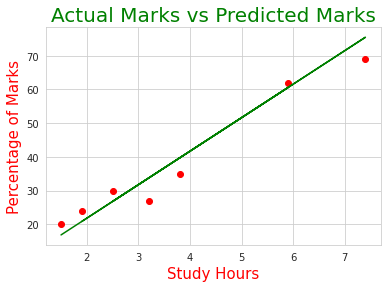

In [12]:
plt.scatter(x=val_P, y=val_Q, color='red')
plt.plot(val_P, var_prediction_Q, color='green')
plt.title('Actual Marks vs Predicted Marks', size=20,color="green")
plt.xlabel('Study Hours', size=15,color="red")
plt.ylabel('Percentage of Marks', size=15,color="red")
plt.show()

# **THE MODEL EVALUATION**

**ACCURACY OF OUR MODEL**

In [13]:
print('Mean of absolute error: ',mean_absolute_error(val_Q,var_prediction_Q))

Mean of absolute error:  4.130879918502482


###**QUESTION: WHAT WILL BE THE PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HRS PER DAY?**

In [14]:
hours = [9.25]
answer_to_the_question = var_regression.predict([hours])
print(f"Score : {round(answer_to_the_question[0],4)}") #format

Score : 93.8927


##**So Accorcing to our regression model, if a student studies for 9.25 hours per day then the student is likely to score 93.8927 marks**